<a href="https://colab.research.google.com/github/Abhishekahhi-io/URL-safety-detection-classification/blob/main/url_safety_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install -U scikit-learn==1.4.2

In [ ]:
# import sklearn
# print(sklearn.__version__)

1.4.2


**Problem Statement**: Detecting Malicious URLs

**Objective**: The goal of this project is to build a machine learning model that accurately classifies URLs into different categories, including benign (safe), phishing, malware, and defacement URLs.

*What is Malicious URL?*

Modified or compromised URLs employed for cyber attacks are known as malicious URLs.
A malicious URL or website generally contains different types of trojans, malware, unsolicited content in the form of phishing, drive-by-download, spams.

📥 **IMPORTING LIBRARIES**

In [ ]:
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

🗃️ **LOAD DATASET**

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/123_phishing/malicious_phish[1].csv")

print(df.shape)
df.head()

(651191, 2)


,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


🔎 **CHECKING FOR NULL VALUES**

In [ ]:
df.isnull().sum()

url     0
type    0
dtype: int64

📊**VALUE COUNTS**

In [ ]:
df["type"].value_counts()

type
benign        428103
defacement     96457
phishing       94111
malware        32520
Name: count, dtype: int64

In [ ]:
df["type"] = df["type"].replace({"benign":"SAFE" , "defacement":"NOT SAFE" , "phishing":"NOT SAFE" , "malware":"NOT SAFE"})

In [ ]:
df["type"].value_counts()

type
SAFE        428103
NOT SAFE    223088
Name: count, dtype: int64

In [ ]:
count = df.value_counts()

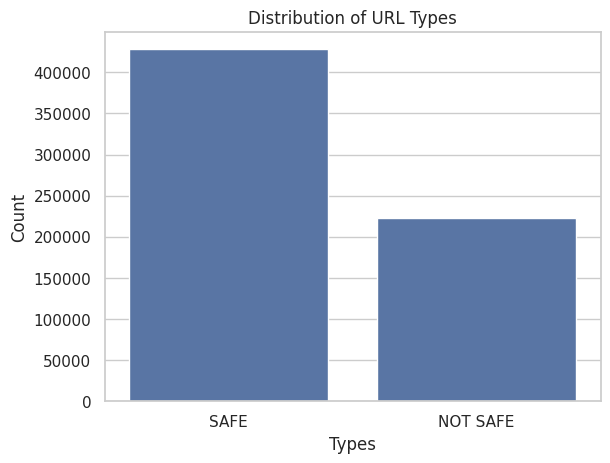

In [ ]:
count = df['type'].value_counts()
sns.barplot(x=count.index, y=count)
plt.xlabel('Types')
plt.ylabel('Count')
plt.title('Distribution of URL Types')
plt.show()

In [ ]:
df.head()

,url,type
0,br-icloud.com.br,NOT SAFE
1,mp3raid.com/music/krizz_kaliko.html,SAFE
2,bopsecrets.org/rexroth/cr/1.htm,SAFE
3,http://www.garage-pirenne.be/index.php?option=...,NOT SAFE
4,http://adventure-nicaragua.net/index.php?optio...,NOT SAFE


**🦾 FEATURE EXTRACTION**

**having_ip_address**:

Generally cyber attackers use an IP address in place of the domain name to hide the identity of the website. this feature will check whether the URL has IP address or not.

In [ ]:
import re
#Use of IP or not in domain
def having_ip_address(url):
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}', url) #IPv6
    if match:
        # print match.group()
        return 1
    else:
        # print 'No matching pattern found'
        return 0
df['use_of_ip'] = df['url'].apply(lambda i: having_ip_address(i))

**Abnormal URL Detection**:

In this feature, we determine whether a given URL is abnormal by comparing its hostname (domain) with the entire URL. If the hostname is not consistent with the full URL, we label it as “abnormal.” This can help identify potentially suspicious or deceptive URLs.

In [ ]:
from urllib.parse import urlparse

def abnormal_url(url):
    hostname = urlparse(url).hostname
    hostname = str(hostname)
    match = re.search(hostname, url)
    if match:
        return 1
    else:
        return 0

In [ ]:
df['abnormal_url'] = df['url'].apply(lambda i: abnormal_url(i))

**count of .**

In [ ]:
def count_dot(url):
    count_dot = url.count('.')
    return count_dot

df['count.'] = df['url'].apply(lambda i: count_dot(i))

**Count-www**

In [ ]:
def count_www(url):
    url.count('www')
    return url.count('www')

df['count-www'] = df['url'].apply(lambda i: count_www(i))

**count@**

In [ ]:
def count_atrate(url):

    return url.count('@')

df['count@'] = df['url'].apply(lambda i: count_atrate(i))

**Count_dir**

In [ ]:
def no_of_dir(url):
    urldir = urlparse(url).path
    return urldir.count('/')

df['count_dir'] = df['url'].apply(lambda i: no_of_dir(i))

**Count_embed_domain**

In [ ]:

def no_of_embed(url):
    urldir = urlparse(url).path
    return urldir.count('//')

df['count_embed_domian'] = df['url'].apply(lambda i: no_of_embed(i))

**Short_url**

In [ ]:
def shortening_service(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',
                      url)
    if match:
        return 1
    else:
        return 0

In [ ]:
df['short_url'] = df['url'].apply(lambda i: shortening_service(i))

**Count_https**

In [ ]:
def count_https(url):
    return url.count('https://')

df['count-https'] = df['url'].apply(lambda i : count_https(i))

**Count_http**

In [ ]:
def count_http(url):
    return url.count('http://')

df['count-http'] = df['url'].apply(lambda i : count_http(i))

**Count%**

In [ ]:
def count_per(url):
    return url.count('%')

df['count%'] = df['url'].apply(lambda i : count_per(i))

**Count?**

In [ ]:
def count_ques(url):
    return url.count('?')

df['count?'] = df['url'].apply(lambda i: count_ques(i))

**Count-**

In [ ]:
def count_hyphen(url):
    return url.count('-')

df['count-'] = df['url'].apply(lambda i: count_hyphen(i))

**Count=**

In [ ]:
def count_equal(url):
    return url.count('=')

df['count='] = df['url'].apply(lambda i: count_equal(i))

**url_length**

In [ ]:
def url_length(url):
    return len(str(url))

In [ ]:
df['url_length'] = df['url'].apply(lambda i: url_length(i))

**hostname_length**

In [ ]:
def hostname_length(url):
    return len(urlparse(url).netloc)

df['hostname_length'] = df['url'].apply(lambda i: hostname_length(i))

In [ ]:
df.head()

,url,type,use_of_ip,abnormal_url,count.,count-www,count@,count_dir,count_embed_domian,short_url,count-https,count-http,count%,count?,count-,count=,url_length,hostname_length
0,br-icloud.com.br,NOT SAFE,0,0,2,0,0,0,0,0,0,0,0,0,1,0,16,0
1,mp3raid.com/music/krizz_kaliko.html,SAFE,0,0,2,0,0,2,0,0,0,0,0,0,0,0,35,0
2,bopsecrets.org/rexroth/cr/1.htm,SAFE,0,0,2,0,0,3,0,0,0,0,0,0,0,0,31,0
3,http://www.garage-pirenne.be/index.php?option=...,NOT SAFE,0,1,3,1,0,1,0,0,0,1,0,1,1,4,88,21
4,http://adventure-nicaragua.net/index.php?optio...,NOT SAFE,0,1,2,0,0,1,0,0,0,1,0,1,1,3,235,23


**Suspicious words in URL**

In [ ]:
def suspicious_words(url):
    match = re.search('PayPal|login|signin|bank|account|update|free|lucky|service|bonus|ebayisapi|webscr',
                      url)
    if match:
        return 1
    else:
        return 0
df['sus_url'] = df['url'].apply(lambda i: suspicious_words(i))

**Count_digits**

In [ ]:
def digit_count(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits


df['count-digits']= df['url'].apply(lambda i: digit_count(i))

**Count_letters**

In [ ]:
def letter_count(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters = letters + 1
    return letters

df['count-letters']= df['url'].apply(lambda i: letter_count(i))

In [ ]:
# !pip install tld

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.8/263.8 kB 4.6 MB/s eta 0:00:00


**First Directory Length**

In [ ]:
from urllib.parse import urlparse
from tld import get_tld

In [ ]:
def fd_length(url):
    urlpath= urlparse(url).path
    try:
        return len(urlpath.split('/')[1])
    except:
        return 0

In [ ]:
df['fd_length'] = df['url'].apply(lambda i: fd_length(i))

**First Directory Length**

In [ ]:
def fd_length(url):
    urlpath= urlparse(url).path
    try:
        return len(urlpath.split('/')[1])
    except:
        return 0

df['fd_length'] = df['url'].apply(lambda i: fd_length(i))

**Length of Top Level Domain**

In [ ]:
get_tld("https://www.google.com")

'com'

In [ ]:
df['tld'] = df['url'].apply(lambda i: get_tld(i,fail_silently=True))

In [ ]:
def tld_length(tld):
    try:
        return len(tld)
    except:
        return -1

df['tld_length'] = df['tld'].apply(lambda i: tld_length(i))

In [ ]:
df.head()

,url,type,use_of_ip,abnormal_url,count.,count-www,count@,count_dir,count_embed_domian,short_url,...,count-,count=,url_length,hostname_length,sus_url,count-digits,count-letters,fd_length,tld,tld_length
0,br-icloud.com.br,NOT SAFE,0,0,2,0,0,0,0,0,...,1,0,16,0,0,0,13,0,None,-1
1,mp3raid.com/music/krizz_kaliko.html,SAFE,0,0,2,0,0,2,0,0,...,0,0,35,0,0,1,29,5,None,-1
2,bopsecrets.org/rexroth/cr/1.htm,SAFE,0,0,2,0,0,3,0,0,...,0,0,31,0,0,1,25,7,None,-1
3,http://www.garage-pirenne.be/index.php?option=...,NOT SAFE,0,1,3,1,0,1,0,0,...,1,4,88,21,0,7,63,9,be,2
4,http://adventure-nicaragua.net/index.php?optio...,NOT SAFE,0,1,2,0,0,1,0,0,...,1,3,235,23,0,22,199,9,net,3


In [ ]:
df.columns

Index(['url', 'type', 'use_of_ip', 'abnormal_url', 'count.', 'count-www',
       'count@', 'count_dir', 'count_embed_domian', 'short_url', 'count-https',
       'count-http', 'count%', 'count?', 'count-', 'count=', 'url_length',
       'hostname_length', 'sus_url', 'count-digits', 'count-letters',
       'fd_length', 'tld', 'tld_length'],
      dtype='object')

In [ ]:
df.drop(columns = ["url" , "tld"] , inplace = True)

**Label Encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
df["type_code"] = lb_make.fit_transform(df["type"])

In [ ]:
lb_make.classes_

array(['NOT SAFE', 'SAFE'], dtype=object)

In [ ]:
lb_make.transform(["NOT SAFE"])

array([0])

In [ ]:
df.drop(columns = ["type"] , inplace = True)

**🔍 EXPLORATORY DATA ANALYSIS (EDA) 📊**

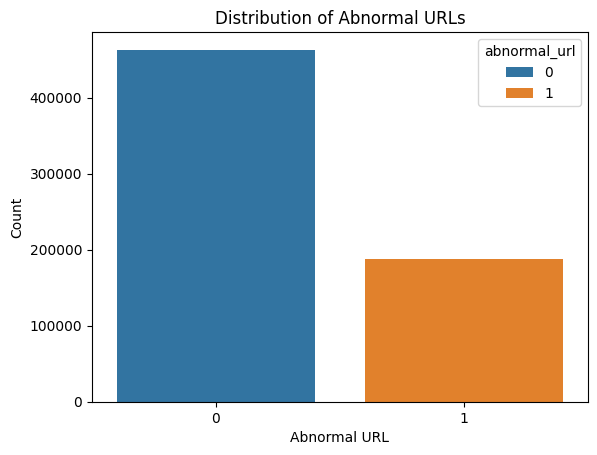

In [ ]:
sns.countplot(x='abnormal_url', data=df, hue = df["abnormal_url"])

plt.xlabel('Abnormal URL')
plt.ylabel('Count')
plt.title('Distribution of Abnormal URLs')
plt.show()

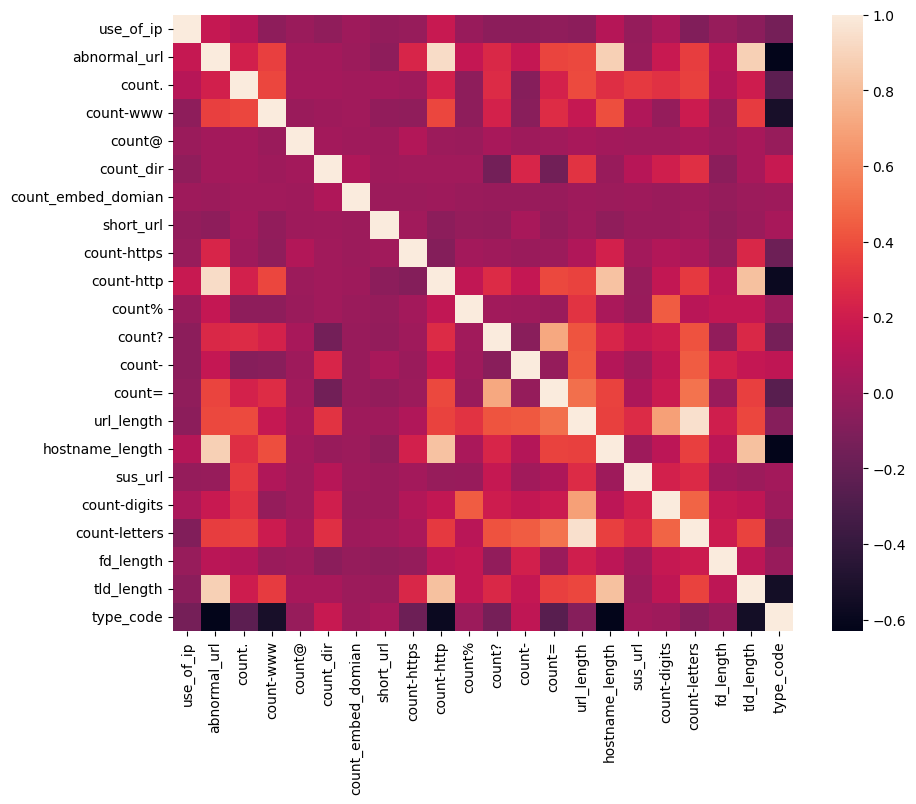

In [ ]:
plt.figure(figsize=(10 , 8))
sns.heatmap(df.corr())
plt.show()

In [ ]:
corr = df.corr()["type_code"].drop("type_code").sort_values(ascending=False)

<Axes: >

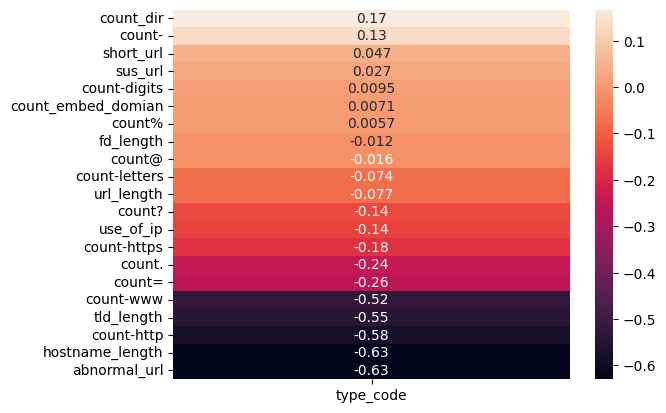

In [ ]:
sns.heatmap(pd.DataFrame(corr) , annot = True)

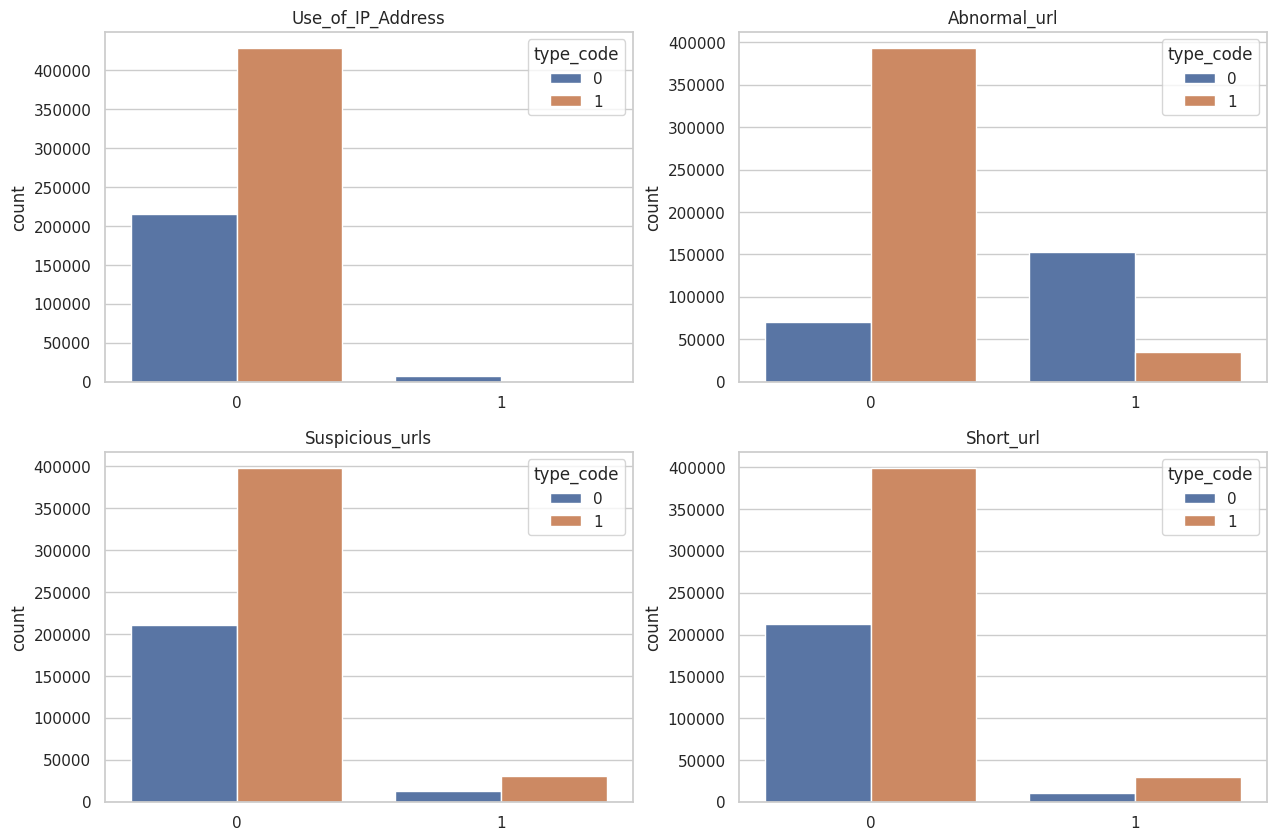

In [ ]:
sns.set(style="whitegrid")

fig, axs = plt.subplots(2, 2, figsize=(15, 10))

sns.countplot(x='use_of_ip', hue='type_code', data=df, ax=axs[0, 0])
axs[0, 0].set_title('Use_of_IP_Address')
axs[0, 0].set_xlabel('')

sns.countplot(x='abnormal_url', hue='type_code', data=df, ax=axs[0, 1])
axs[0, 1].set_title('Abnormal_url')
axs[0, 1].set_xlabel('')

sns.countplot(x='sus_url', hue='type_code', data=df, ax=axs[1, 0])
axs[1, 0].set_title('Suspicious_urls')
axs[1, 0].set_xlabel('')

sns.countplot(x='short_url', hue='type_code', data=df, ax=axs[1, 1])
axs[1, 1].set_title('Short_url')
axs[1, 1].set_xlabel('')

for ax in axs.flat:
    ax.set(ylabel='count')

plt.show()


✂️ **TRAIN AND TEST SPLIT**

In [ ]:
df.columns

Index(['use_of_ip', 'abnormal_url', 'count.', 'count-www', 'count@',
       'count_dir', 'count_embed_domian', 'short_url', 'count-https',
       'count-http', 'count%', 'count?', 'count-', 'count=', 'url_length',
       'hostname_length', 'sus_url', 'count-digits', 'count-letters',
       'fd_length', 'tld_length', 'type_code'],
      dtype='object')

In [ ]:
x = df.drop(columns = ["type_code"])

In [ ]:
y = df["type_code"]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.25, random_state=5)

In [ ]:
x_train.head()

,use_of_ip,abnormal_url,count.,count-www,count@,count_dir,count_embed_domian,short_url,count-https,count-http,...,count?,count-,count=,url_length,hostname_length,sus_url,count-digits,count-letters,fd_length,tld_length
99832,0,0,1,0,0,0,0,0,0,0,...,0,0,0,20,0,0,0,19,0,-1
577657,0,0,4,1,0,2,0,0,0,0,...,2,1,3,67,0,1,3,47,2,-1
317628,0,0,1,0,0,2,0,0,0,0,...,0,1,0,29,0,0,3,22,4,-1
586160,0,0,3,1,0,1,0,0,0,0,...,0,2,0,42,0,0,0,36,7,-1
455145,0,0,1,0,0,4,0,0,0,0,...,0,0,0,35,0,1,4,26,4,-1


🧠 **MODEL BUILDING**

In [ ]:
from sklearn.naive_bayes import GaussianNB , BernoulliNB

In [ ]:
gauss = GaussianNB()

In [ ]:
gauss.fit(x_train , y_train)

GaussianNB()

In [ ]:
from sklearn.metrics import accuracy_score , confusion_matrix

In [ ]:
accuracy_score(y_test , gauss.predict(x_test))

0.8352252484674259

In [ ]:
confusion_matrix(y_test , gauss.predict(x_test))

array([[37562, 18210],
       [ 8615, 98411]])

In [ ]:
bernoulli = BernoulliNB()

In [ ]:
bernoulli.fit(x_train , y_train)

BernoulliNB()

In [ ]:
accuracy_score(y_test , bernoulli.predict(x_test))

0.8367424661236624

In [ ]:
confusion_matrix(y_test , bernoulli.predict(x_test))

array([[38165, 17607],
       [ 8971, 98055]])

In [ ]:
# Random Forest Model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100,max_features='sqrt')
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
print("RANDOMFOREST MODEL")
print(classification_report(y_test,y_pred))

score = accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score)

RANDOMFOREST MODEL
              precision    recall  f1-score   support

           0       0.97      0.95      0.96     55772
           1       0.97      0.98      0.98    107026

    accuracy                           0.97    162798
   macro avg       0.97      0.97      0.97    162798
weighted avg       0.97      0.97      0.97    162798

accuracy:   0.973


In [ ]:
#Gradientboost
gradient_model = GradientBoostingClassifier(n_estimators=100 , learning_rate = 0.1)
gradient_model.fit(x_train , y_train)
y_pred = gradient_model.predict(x_test)
print("GRADIENTBOOST MODEL")
print(classification_report(y_test,y_pred))

score = accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score)

GRADIENTBOOST MODEL
              precision    recall  f1-score   support

           0       0.96      0.92      0.94     55772
           1       0.96      0.98      0.97    107026

    accuracy                           0.96    162798
   macro avg       0.96      0.95      0.96    162798
weighted avg       0.96      0.96      0.96    162798

accuracy:   0.961


In [ ]:
#Adaboost
ada = AdaBoostClassifier(n_estimators=1000 , learning_rate = 1)
ada.fit(x_train , y_train)
y_pred = ada.predict(x_test)
print("ADABOOST MODEL")
print(classification_report(y_test,y_pred))

score = accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score)

In [ ]:
#XGboost
xgb_c = xgb.XGBClassifier(n_estimators= 100)
xgb_c.fit(x_train,y_train)
y_pred_x = xgb_c.predict(x_test)
print("XGBOOST MODEL")
print(classification_report(y_test,y_pred_x,))

score = accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score)

XGBOOST MODEL
              precision    recall  f1-score   support

           0       0.98      0.94      0.96     55772
           1       0.97      0.99      0.98    107026

    accuracy                           0.97    162798
   macro avg       0.97      0.96      0.97    162798
weighted avg       0.97      0.97      0.97    162798

accuracy:   0.961


FEATURE IMPORTANCE

In [ ]:
confusion_matrix(y_test , rf.predict(x_test))

array([[ 52932,   2840],
       [  1620, 105406]])

In [ ]:
for i , j in zip(list(rf.feature_importances_) , list(x_train.columns)):
  print(i , j)

0.00145545462741977 use_of_ip
0.11329878284049559 abnormal_url
0.057397888953184845 count.
0.12011164050053943 count-www
0.00012816416239065304 count@
0.12703773134513566 count_dir
0.0005274050601438071 count_embed_domian
0.0024086848639063114 short_url
0.006409634422674471 count-https
0.08728230685881591 count-http
0.007191202917593857 count%
0.006429431791992887 count?
0.03092284849786061 count-
0.018819570239866152 count=
0.06748814798570847 url_length
0.14838605766833504 hostname_length
0.005722286924440838 sus_url
0.02607900265918775 count-digits
0.050514634364331845 count-letters
0.05224302421325799 fd_length
0.07014609910271814 tld_length


<Axes: >

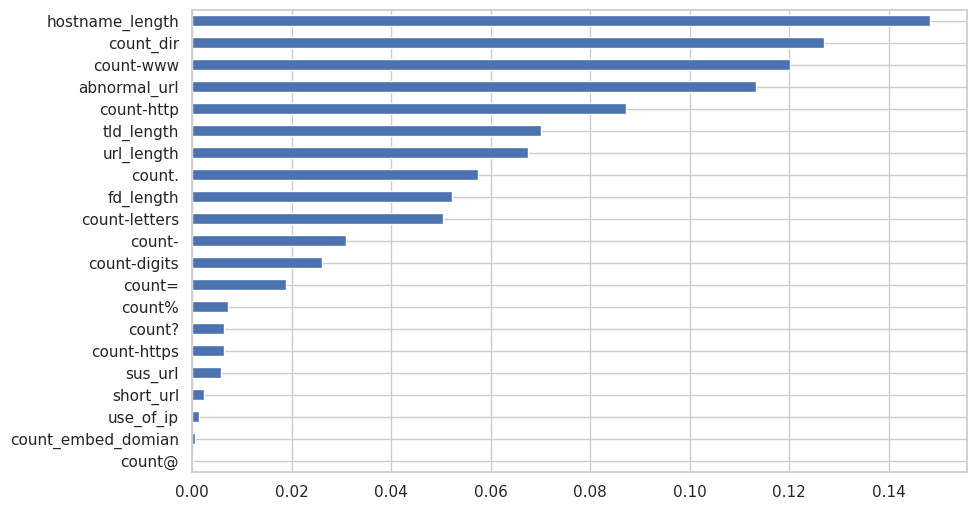

In [ ]:
feat_importances = pd.Series(rf.feature_importances_, index=x_train.columns)
feat_importances.sort_values().plot(kind="barh",figsize=(10, 6))

**🌟 MODEL PREDICTON**

In [ ]:
def main(url):

    status = []

    status.append(having_ip_address(url))
    status.append(abnormal_url(url))
    status.append(count_dot(url))
    status.append(count_www(url))
    status.append(count_atrate(url))
    status.append(no_of_dir(url))
    status.append(no_of_embed(url))

    status.append(shortening_service(url))
    status.append(count_https(url))
    status.append(count_http(url))

    status.append(count_per(url))
    status.append(count_ques(url))
    status.append(count_hyphen(url))
    status.append(count_equal(url))

    status.append(url_length(url))
    status.append(hostname_length(url))
    status.append(suspicious_words(url))
    status.append(digit_count(url))
    status.append(letter_count(url))
    status.append(fd_length(url))
    tld = get_tld(url,fail_silently=True)

    status.append(tld_length(tld))

    return status

In [ ]:
features_test = main("titaniumcorporate.co.za")

In [ ]:
features_test

[0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 23, 0, 0, 0, 21, 0, -1]

In [ ]:
lb_make.transform(["SAFE"])

array([1])

In [ ]:
# predict function
def get_prediction_from_url(test_url):
    features_test = main(test_url)
    features_test = pd.DataFrame({i:[j] for i , j in zip([i for i in x_train.columns] , features_test)})
    pred = rf.predict(features_test)
    if int(pred[0]) == 1:
        res="SAFE"
        return res

    elif int(pred[0]) == 0:
        res="NOT SAFE"
        return res

In [ ]:
x_train.columns

Index(['use_of_ip', 'abnormal_url', 'count.', 'count-www', 'count@',
       'count_dir', 'count_embed_domian', 'short_url', 'count-https',
       'count-http', 'count%', 'count?', 'count-', 'count=', 'url_length',
       'hostname_length', 'sus_url', 'count-digits', 'count-letters',
       'fd_length', 'tld_length'],
      dtype='object')

In [ ]:
# predicting sample raw URLs
urls = ['titaniumcorporate.co.za','en.wikipedia.org/wiki/North_Dakota']

for url in urls:
     print(get_prediction_from_url(url))

NOT SAFE
SAFE


In [ ]:
get_prediction_from_url("//itaniumcorporate.co.za")

'NOT SAFE'

In [ ]:
get_prediction_from_url("www.kaggle.com")

'SAFE'

In [ ]:
needed_files = {"label_encoder":lb_make , "model":rf}

In [ ]:
import pickle

In [ ]:
file = open("file1.pkl" , "wb")

In [ ]:
pickle.dump(needed_files , file)

In [ ]:
check = open("file1.pkl" , "rb")

In [ ]:
pickle.load(check)

{'label_encoder': LabelEncoder(), 'model': RandomForestClassifier()}

In [ ]:
df_new=pd.read_csv("/content/drive/MyDrive/123_phishing/malicious_phish[1].csv")

In [ ]:
!jupyter nbconvert --to html /